# Tutorial Notebook #1 (full)

This tutorial notebook showcases all of the functions available in the tool. It was the notebook off of which the tool was developed and goes into depth about what you can explore and what choices can be made. For a more consise demo please see Tutorial Notebook #2. 

Last Revised 12/15/21
Author: Megan Tabbutt

In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from Explorer import Explorer

___ 

# Part 1: Exploring the Data and Finding Fair Subgroups:

### Based on either the full dataset or a subset and/or normalized data

## 1. Setup the data:

In [3]:
census_data = Explorer("./USCensus_ACS_5yr_2019_Modified.csv")

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### View the dataframe:

In [4]:
df = census_data.getDataFrame()
df.head()

,Division,PersonNumber,Region,State,Age,Citizenship,YearNaturalization,ClassOfWorker,SelfCareDiff,HearingDiff,...,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
0,3,1,2,55,57,1,NaN,6.0,2.0,2,...,3,4.0,16.0,1,0.0,8.0,1,73.0,31.0,16400.0
1,3,2,2,55,30,1,NaN,1.0,2.0,2,...,5,4.0,20.0,1,37300.0,40.0,2,90.0,49.0,37300.0
2,3,3,2,55,55,1,NaN,1.0,2.0,2,...,3,4.0,16.0,2,7200.0,16.0,2,219.0,127.0,7200.0
3,3,1,2,55,76,1,NaN,NaN,2.0,2,...,1,4.0,16.0,1,0.0,NaN,1,NaN,NaN,32200.0
4,3,2,2,55,72,1,NaN,NaN,2.0,2,...,1,4.0,16.0,2,0.0,NaN,1,NaN,NaN,12200.0


## 2. Correlations:

## a. You know what correlation you want to look at: 

### Return the correlation value of the two columns:

In [5]:
census_data.getCorrelation('Age', 'EducationAttainment')

(0.524380421103229, 0.0)

### Plot the Corralation data:

Pearson's correlation coefficent: r = 0.52438


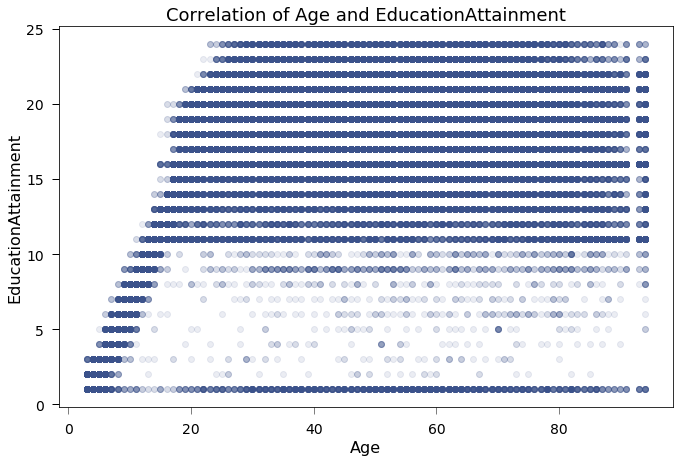

In [6]:
census_data.plotCorrelation('Age', 'EducationAttainment', alpha=.1)

## b. You want to explore the correlations of all pairs:

### Calculate and plot the correlation matrix:

In [7]:
correlationMatrix = census_data.getCorrelationMatrix()
correlationMatrix

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Division,PersonNumber,Region,State,Age,Citizenship,YearNaturalization,ClassOfWorker,SelfCareDiff,HearingDiff,...,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PersonNumber,NaN,1.000000,NaN,NaN,-0.592659,0.001400,0.188039,-0.072643,0.056644,0.093283,...,0.478547,0.092434,-0.571533,0.008692,-0.102739,-0.147591,0.054977,0.093415,0.094432,-0.166733
Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,-0.592659,NaN,NaN,1.000000,-0.000648,-0.617403,0.164900,-0.185078,-0.231463,...,-0.673367,-0.241188,0.524380,0.033406,-0.098864,0.077450,-0.086460,-0.164776,-0.169289,0.099718
Citizenship,NaN,0.001400,NaN,NaN,-0.000648,1.000000,NaN,-0.017118,0.007616,0.014138,...,-0.033985,0.043178,-0.001288,0.004777,0.009654,0.013246,0.098047,0.020735,0.024290,-0.010402
YearNaturalization,NaN,0.188039,NaN,NaN,-0.617403,NaN,1.000000,-0.079152,0.145805,0.179860,...,0.183101,0.208971,-0.055709,-0.018844,0.152471,0.071913,0.107110,0.048531,0.047937,0.019830
ClassOfWorker,NaN,-0.072643,NaN,NaN,0.164900,-0.017118,-0.079152,1.000000,-0.011633,-0.033644,...,-0.124571,-0.047143,0.061558,-0.038505,-0.082154,0.068992,0.019969,-0.045576,-0.025354,0.058061
SelfCareDiff,NaN,0.056644,NaN,NaN,-0.185078,0.007616,0.145805,-0.011633,1.000000,0.143237,...,0.003393,0.037819,0.033476,-0.021471,0.110123,0.046345,0.032310,-0.006503,-0.008493,0.075678
HearingDiff,NaN,0.093283,NaN,NaN,-0.231463,0.014138,0.179860,-0.033644,0.143237,1.000000,...,0.099108,0.161347,-0.029841,0.057790,0.084941,0.022343,0.027785,0.012274,0.014048,0.019064


### Get the highest (and lowest) non trivial correlation pair:

In [8]:
census_data.getMaxCorrelation()

[('TimeOfWorkDeparture', 'TimeOfWorkArrival', 0.9712008412893816),
 ('MaritalStatus', 'Age', -0.6733670749093839)]

### Pull out all of the highest and lowest pairs above a threshold value:

In [9]:
census_data.getMaxCorrelation(threshold=.6)

[(['TotalIncome', 'TimeOfWorkDeparture', 'TimeOfWorkArrival', 'Wages'],
  ['Wages', 'TimeOfWorkArrival', 'TimeOfWorkDeparture', 'TotalIncome'],
  [0.8264503287513844,
   0.9712008412893816,
   0.9712008412893816,
   0.8264503287513844]),
 (['YearNaturalization', 'MaritalStatus', 'Age', 'Age'],
  ['Age', 'Age', 'YearNaturalization', 'MaritalStatus'],
  [-0.6174029237418879,
   -0.6733670749093839,
   -0.6174029237418879,
   -0.6733670749093839])]

Pearson's correlation coefficent: r = -0.673367


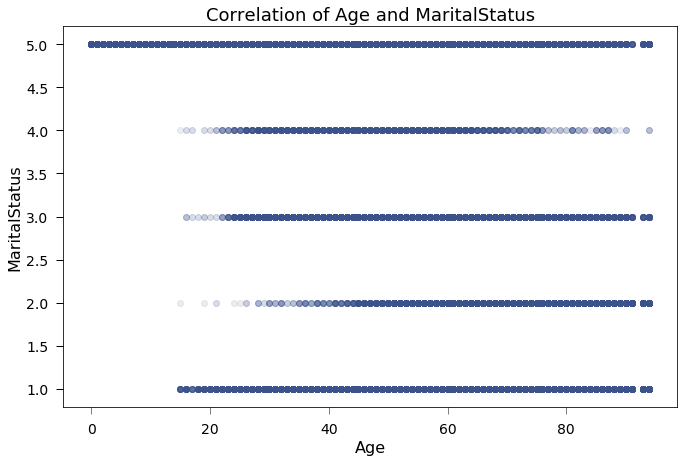

In [10]:
census_data.plotCorrelation('Age', 'MaritalStatus', alpha=.1)

## 3. Distribution Statistics:

### List summary statistics for a column:

In [11]:
census_data.getSummaryStats("Age", printStats=True)

num:  295806 , range:  94 , mean:  42.785745 , variance:  568.507405 , skew:  -0.064215


(295806, 94, 42.78574471106063, 568.5074049738768, -0.06421526733986443)

### Plot the summary statistics:

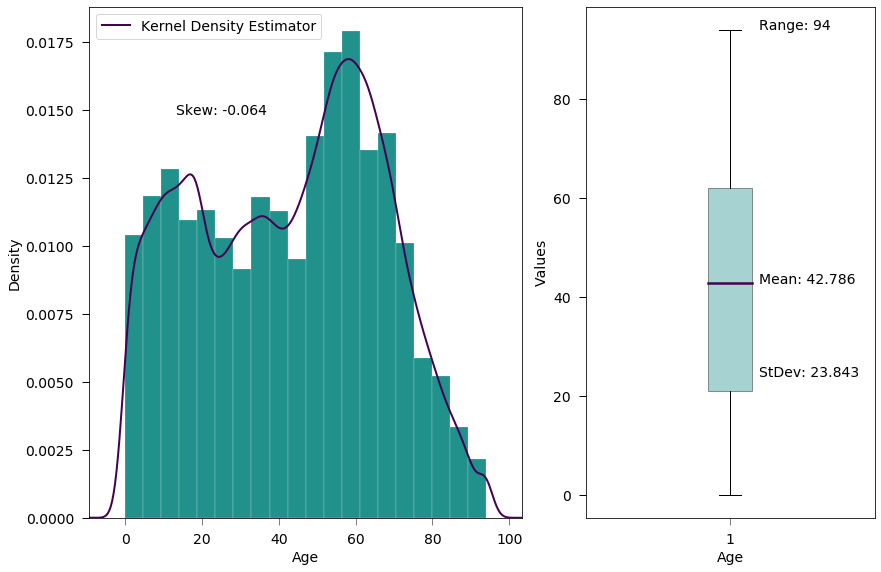

In [12]:
census_data.plotSummaryStats("Age", printStats=False)

### Create summary statistics for the whole dataframe:

In [13]:
summaryMatrix = census_data.getSummaryMatrix()
summaryMatrix

,counts,range,mean,variance,skew
Division,295806,0.0,3.000000,0.000000e+00,0.000000
PersonNumber,295806,17.0,2.009368,1.653647e+00,1.884099
Region,295806,0.0,2.000000,0.000000e+00,0.000000
State,295806,0.0,55.000000,0.000000e+00,0.000000
Age,295806,94.0,42.785745,5.685074e+02,-0.064215
Citizenship,295806,4.0,1.119883,3.931195e-01,5.278645
YearNaturalization,4712,75.0,1996.662139,2.961304e+02,-1.043889
ClassOfWorker,184928,8.0,2.060315,3.443290e+00,1.713416
SelfCareDiff,281362,1.0,1.965955,3.288616e-02,-5.138875
HearingDiff,295806,1.0,1.957168,4.099767e-02,-4.515718


### Plot the summary stats but compare to another column:

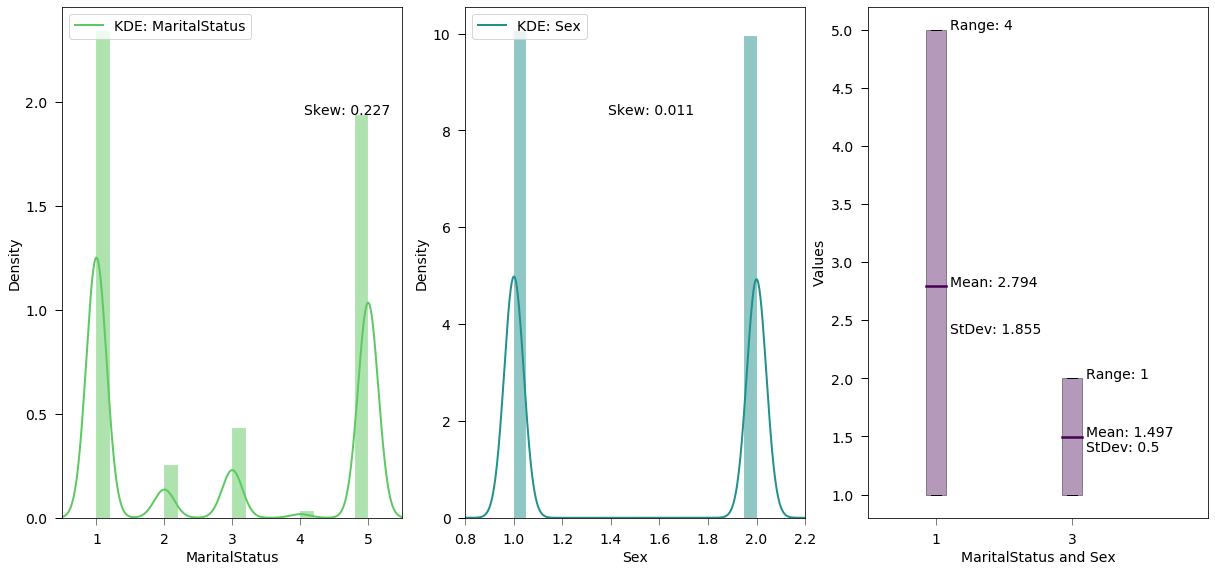

In [14]:
census_data.plotSummaryStatsComparison("MaritalStatus", "Sex", printStats=False)

## 4. Clustering

In [15]:
clusters = census_data.printClusters(clusterdata='summary', ncomponents=7, reg_covar=.0001)

['ClassOfWorker', 'HoursWorked']

['Wages']

['TotalIncome']

['Division', 'PersonNumber', 'Region', 'State', 'Age', 'Citizenship', 'SelfCareDiff', 'HearingDiff', 'VisionDiff', 'CognitiveDiff', 'MaritalStatus', 'EducationAttainment', 'Sex', 'HealthInsurance']

['YearNaturalization', 'EnglishSpeaking', 'GaveBirthLastYear']

['MilitaryService']

['TravelTimeToWork', 'MeansOfTransportation', 'TimeOfWorkArrival', 'TimeOfWorkDeparture']



In [16]:
df = None

## 5. Selecting a Subset:

In [17]:
census_data_subset = Explorer("./USCensus_ACS_5yr_2019_Modified_Subset.csv")
df_subset = census_data_subset.getDataFrame()
df_subset

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Age,Citizenship,YearNaturalization,ClassOfWorker,EnglishSpeaking,TravelTimeToWork,MeansOfTransportation,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
0,57,1,NaN,6.0,NaN,15.0,1.0,3,4.0,16.0,1,0.0,8.0,1,73.0,31.0,16400.0
1,30,1,NaN,1.0,NaN,10.0,1.0,5,4.0,20.0,1,37300.0,40.0,2,90.0,49.0,37300.0
2,55,1,NaN,1.0,NaN,25.0,1.0,3,4.0,16.0,2,7200.0,16.0,2,219.0,127.0,7200.0
3,76,1,NaN,NaN,NaN,NaN,NaN,1,4.0,16.0,1,0.0,NaN,1,NaN,NaN,32200.0
4,72,1,NaN,NaN,NaN,NaN,NaN,1,4.0,16.0,2,0.0,NaN,1,NaN,NaN,12200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295801,6,1,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,1,NaN,NaN,1,NaN,NaN,NaN
295802,4,1,NaN,NaN,NaN,NaN,NaN,5,NaN,2.0,2,NaN,NaN,1,NaN,NaN,NaN
295803,29,1,NaN,1.0,NaN,58.0,1.0,1,4.0,19.0,1,52000.0,40.0,1,57.0,13.0,52000.0
295804,29,1,NaN,1.0,NaN,1.0,1.0,1,4.0,16.0,2,35000.0,50.0,1,62.0,23.0,35000.0


In [18]:
summaryMatrix = census_data_subset.getSummaryMatrix()
summaryMatrix

,counts,range,mean,variance,skew
Age,295806,94.0,42.785745,5.685074e+02,-0.064215
Citizenship,295806,4.0,1.119883,3.931195e-01,5.278645
YearNaturalization,4712,75.0,1996.662139,2.961304e+02,-1.043889
ClassOfWorker,184928,8.0,2.060315,3.443290e+00,1.713416
EnglishSpeaking,16966,3.0,1.514971,6.488475e-01,1.432354
TravelTimeToWork,136887,154.0,23.616903,4.708563e+02,3.121853
MeansOfTransportation,144884,11.0,1.988860,8.455720e+00,2.658817
MaritalStatus,295806,4.0,2.793517,3.440778e+00,0.226800
MilitaryService,239668,3.0,3.810759,3.268117e-01,-2.789192
EducationAttainment,287335,23.0,16.139437,2.815495e+01,-1.307175


In [19]:
clusters = census_data_subset.printClusters(clusterdata='summary', ncomponents=7, reg_covar=.0001)

['ClassOfWorker', 'HoursWorked']

['TotalIncome']

['Wages']

['Age', 'Citizenship', 'MaritalStatus', 'EducationAttainment', 'Sex', 'HealthInsurance']

['YearNaturalization', 'EnglishSpeaking']

['TravelTimeToWork', 'MeansOfTransportation', 'TimeOfWorkArrival', 'TimeOfWorkDeparture']

['MilitaryService']



In [20]:
df_subset = None

## 6. Normalizing a dataset:

### Pull in the dataset as before, normalize it and update the class object.

In [21]:
census_data_norm = Explorer("./USCensus_ACS_5yr_2019_Modified.csv")
dfn = census_data_norm.getDataFrame()

dfn = dfn.drop(["Division", "Region", "State", "SelfCareDiff", "HearingDiff", "VisionDiff", "CognitiveDiff"], 1)

for col in dfn:
    dfn[col] = dfn[col] / max(dfn[col])
    
census_data_norm.setDataFrame(dfn)
dfn = census_data_norm.getDataFrame()

#dfn

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


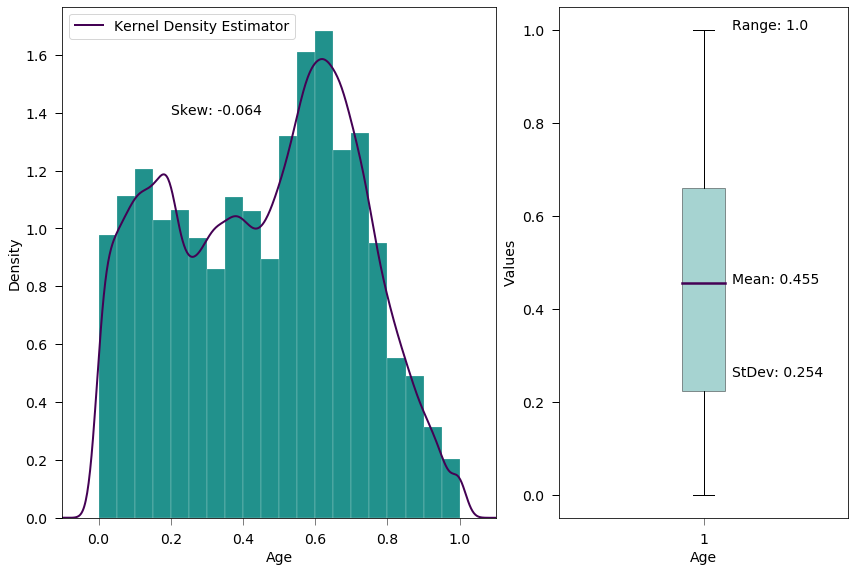

In [22]:
census_data_norm.plotSummaryStats("Age", printStats=False)

## 7. Selecting Similar Columns and Comparing:

### Select a column from the clustering groups:

In [23]:
census_data_norm.selectSimilarColumn("Age", "cluster")

['PersonNumber',
 'Age',
 'Citizenship',
 'MaritalStatus',
 'EducationAttainment',
 'Sex',
 'HealthInsurance']

### Or you can choose a column that is the closest to one of the stats parameters:

In [24]:
census_data_norm.selectSimilarColumn("Age", "skew")

most similar column: HoursWorked diff: 0.018773


'HoursWorked'

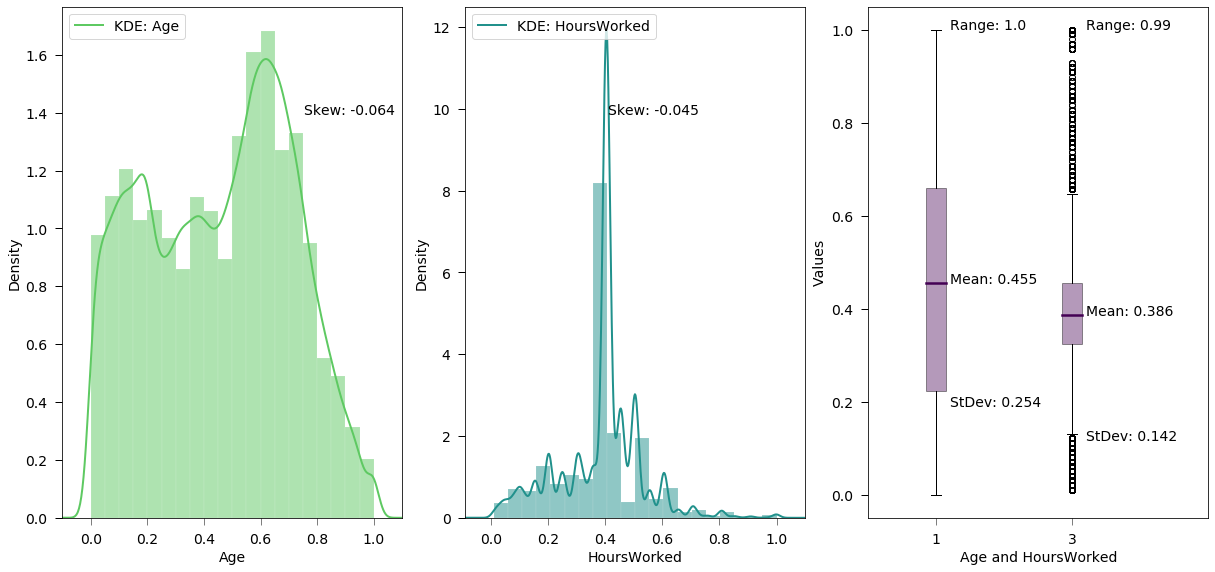

In [25]:
census_data_norm.plotSummaryStatsComparison("Age", "HoursWorked", printStats=False)

In [26]:
dfn = None

___ 

# Part 2: Comparing Subgroups:

## 1. Interested in how the distribution of a single depenedent variable changes:

### List the summary statistics of all possible categories and cuts to be made: 

In [27]:
census_data = Explorer("./USCensus_ACS_5yr_2019_Modified_subset.csv")
df_subset = census_data.getDataFrame()

categories = census_data.getCategoricalChoices()
print(categories)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


['Citizenship', 'ClassOfWorker', 'MeansOfTransportation', 'MaritalStatus', 'MilitaryService', 'Sex', 'HealthInsurance']


In [28]:
subgroupMatrix = census_data.getSubGroupsMatrix(df_subset, categories, "Age")
subgroupMatrix

,Citizenship_1,Citizenship_2,Citizenship_3,Citizenship_4,Citizenship_5,ClassOfWorker_1.0,ClassOfWorker_2.0,ClassOfWorker_3.0,ClassOfWorker_4.0,ClassOfWorker_5.0,...,MaritalStatus_4,MaritalStatus_5,MilitaryService_1.0,MilitaryService_2.0,MilitaryService_3.0,MilitaryService_4.0,Sex_1,Sex_2,HealthInsurance_1,HealthInsurance_2
counts,284640,602,1342,4712,4510,122830,16434,13723,7689,2807,...,1941,114689,161,20294,4284,214929,148729,147077,280340,15466
range,94,94,94,94,94,78,78,78,78,78,...,79,94,38,76,77,77,94,94,94,94
mean,42.774047920179875,42.22757475083056,37.4150521609538,49.49342105263158,38.188470066518846,43.71647805910608,46.97328708774492,49.0085258325439,46.114709325009756,48.03669397933737,...,49.25090159711489,20.925799335594522,30.677018633540374,65.46723169409678,59.807889822595705,49.28327959465684,41.99365960908767,43.58672668058228,43.26995077406007,34.00892279839648
variance,575.1130621312833,409.0146792997275,424.9588485804241,429.518530259527,284.39028619282743,264.28909580317645,253.69447289183472,236.2438421860948,237.3284113391443,215.5043551390336,...,208.427222124848,295.09661474910985,113.88253105590061,234.6688862699736,322.51199937520346,342.9539730601844,552.9169424789641,583.0008227571177,578.3302239978052,309.1951353801372
skew,-0.07027036555533915,0.04414579378700769,0.17583046421018142,-0.07846566389890923,0.5049108921731873,0.01800894869411758,-0.0848361225902944,-0.2299725780388193,-0.10265864596040658,-0.2021445428268359,...,0.30723362561919715,1.3975094892706788,0.5764566673501024,-0.6065321403767249,-0.7201181114152795,0.048941291240524,-0.06322535648524126,-0.07045150134271955,-0.0916966760203466,0.010181195697982445


### Plot the resulting overview:

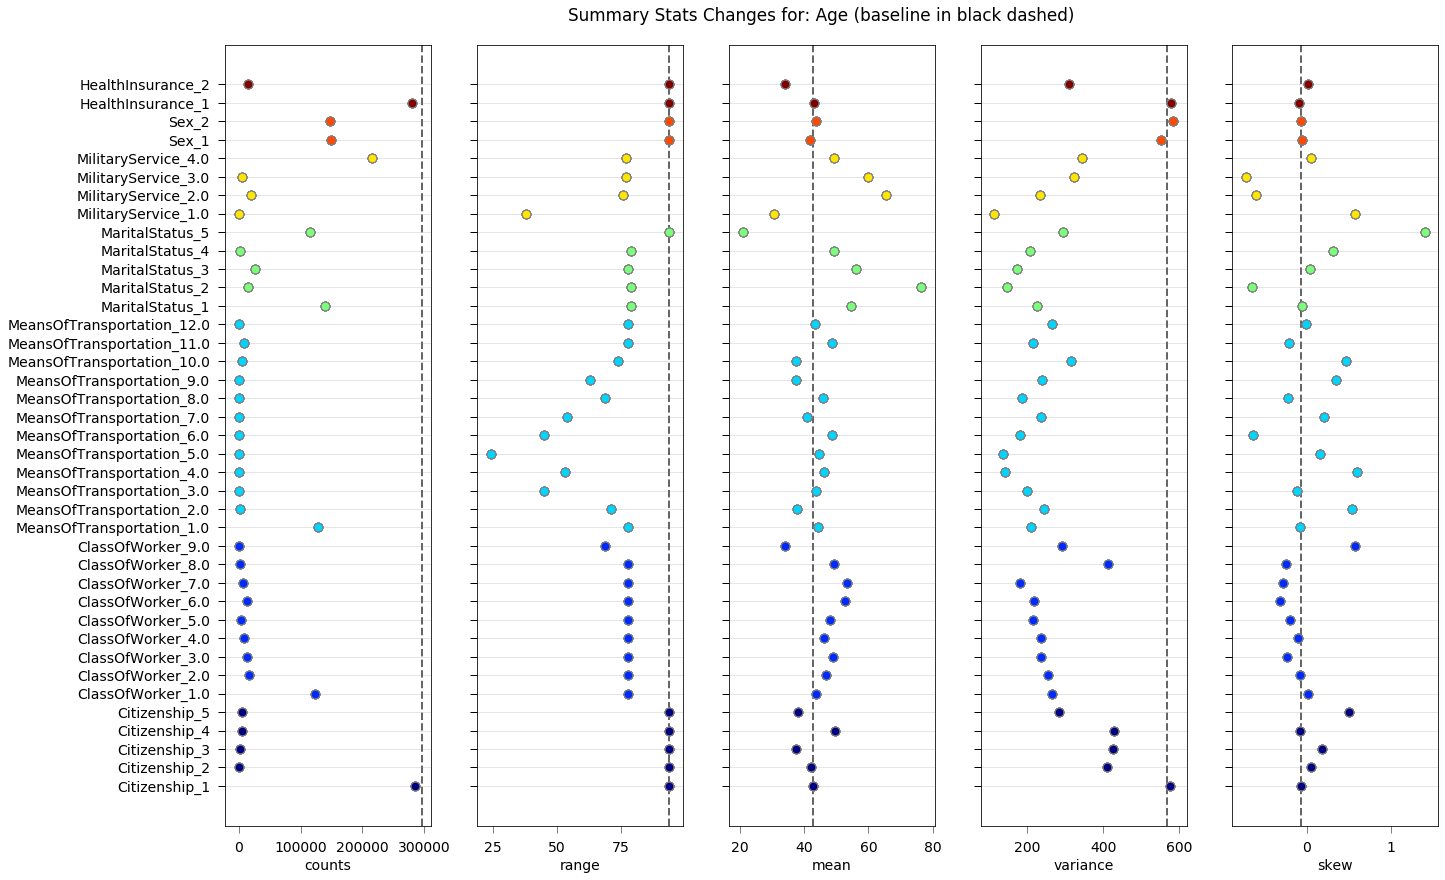

In [29]:
census_data.plotSubGroupMatrix("Age", categories, subgroupMatrix.columns, style="overview")

### View a subset of the categories that you are interested in:

In [30]:
subgroupMatrix = census_data.getSubGroupsMatrix(df_subset, ['MilitaryService', 'Sex', 'HealthInsurance'], "Age")
subgroupMatrix

,MilitaryService_1.0,MilitaryService_2.0,MilitaryService_3.0,MilitaryService_4.0,Sex_1,Sex_2,HealthInsurance_1,HealthInsurance_2
counts,161,20294,4284,214929,148729,147077,280340,15466
range,38,76,77,77,94,94,94,94
mean,30.677018633540374,65.46723169409678,59.807889822595705,49.28327959465684,41.99365960908767,43.58672668058228,43.26995077406007,34.00892279839648
variance,113.88253105590061,234.6688862699736,322.51199937520346,342.9539730601844,552.9169424789641,583.0008227571177,578.3302239978052,309.1951353801372
skew,0.5764566673501024,-0.6065321403767249,-0.7201181114152795,0.048941291240524,-0.06322535648524126,-0.07045150134271955,-0.0916966760203466,0.010181195697982445


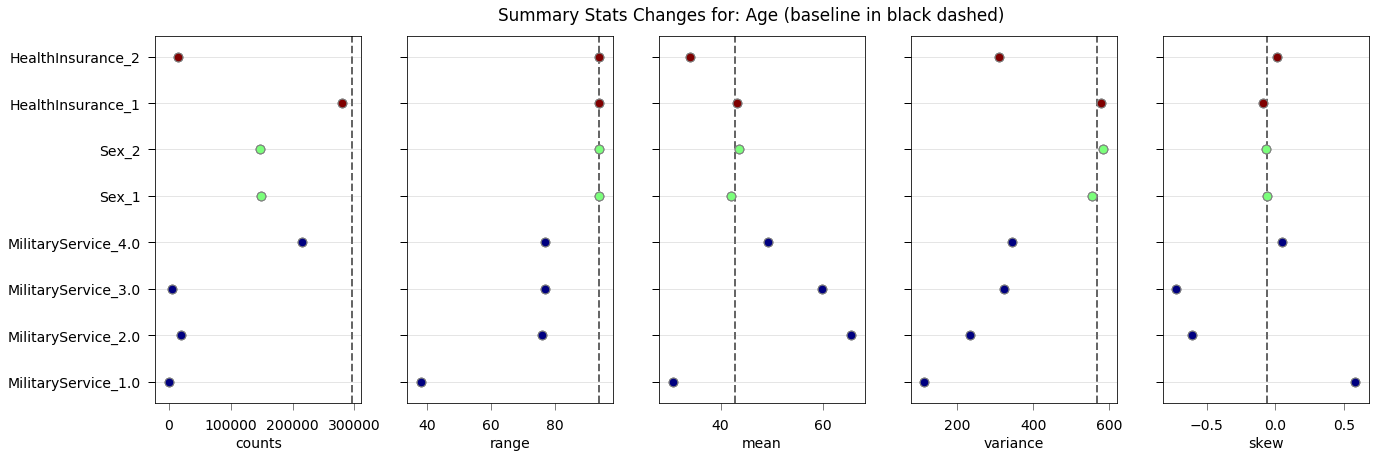

In [31]:
census_data.plotSubGroupMatrix("Age", ['MilitaryService', 'Sex', 'HealthInsurance'], subgroupMatrix.columns, style="overview")

## 2. Interested in how the correlation of two dependent variables changes from one group to another:

### Compare a subgroup to the original dataframe: 

((0.524380421103229, 0.0), (0.057559511296345074, 1.2113447132392104e-90))

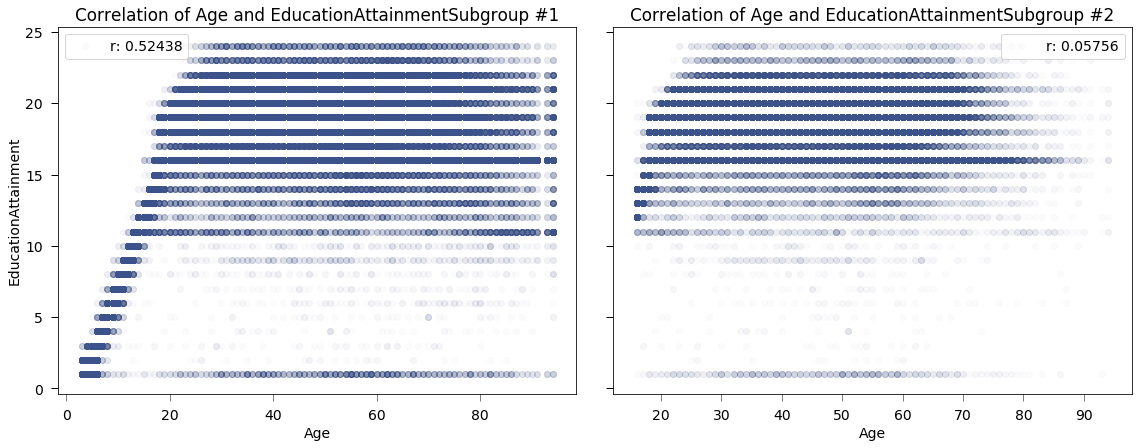

In [32]:
df1 = df_subset
df2 = df_subset[df_subset['ClassOfWorker'] == 1.0]


census_data.getSubgroupCorrelation(df1, df2, "Age", "EducationAttainment", plotting=True, alpha=.02)

In [33]:
df1, df2 = None, None

___
# Part 3: Plotting the data and comparing subgroups:

## Use the information above (or expertise) to choose subgroups to compare

In [34]:
census_data = Explorer("./USCensus_ACS_5yr_2019_Modified_subset.csv")
df = census_data.getDataFrame()

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### Going to compare the regular (full) dataset to the one where we cut on ClassofWorker=1:

In [35]:
df_subset = df[df['ClassOfWorker'] == 1]
df_subset

,Age,Citizenship,YearNaturalization,ClassOfWorker,EnglishSpeaking,TravelTimeToWork,MeansOfTransportation,MaritalStatus,MilitaryService,EducationAttainment,Sex,Wages,HoursWorked,HealthInsurance,TimeOfWorkArrival,TimeOfWorkDeparture,TotalIncome
1,30,1,NaN,1.0,NaN,10.0,1.0,5,4.0,20.0,1,37300.0,40.0,2,90.0,49.0,37300.0
2,55,1,NaN,1.0,NaN,25.0,1.0,3,4.0,16.0,2,7200.0,16.0,2,219.0,127.0,7200.0
7,50,1,NaN,1.0,NaN,20.0,1.0,1,4.0,16.0,2,31000.0,60.0,1,68.0,25.0,31000.0
8,50,1,NaN,1.0,NaN,30.0,1.0,1,2.0,16.0,1,98000.0,60.0,1,67.0,22.0,98000.0
9,68,1,NaN,1.0,NaN,NaN,NaN,1,2.0,16.0,1,0.0,NaN,1,NaN,NaN,39600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295792,51,1,NaN,1.0,NaN,20.0,1.0,1,4.0,16.0,1,24000.0,40.0,1,254.0,137.0,24000.0
295793,49,1,NaN,1.0,NaN,45.0,1.0,1,4.0,22.0,2,30200.0,40.0,1,103.0,55.0,30200.0
295799,41,1,NaN,1.0,NaN,NaN,NaN,1,4.0,21.0,2,0.0,NaN,1,NaN,NaN,0.0
295803,29,1,NaN,1.0,NaN,58.0,1.0,1,4.0,19.0,1,52000.0,40.0,1,57.0,13.0,52000.0


## Special Plotting Routine #1

### Some of the ideal choices for this plotting routine (but use as you like)

- x choice: quasi-continuous, (ordered implied)
- y1 (main): quasi-continuous, (ordered implied)
- y2 (supplemental): Doesn't need to be continuous at all, but an order is implied by the color bar choice.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


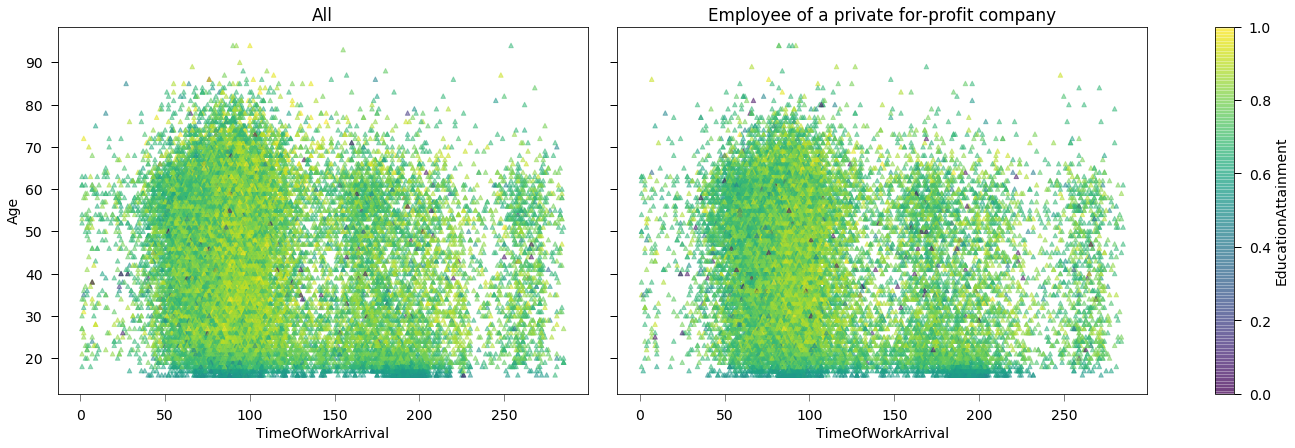

In [36]:
census_data.getSpecialPlot1("TimeOfWorkArrival", "Age", "EducationAttainment", df, df_subset, titleOn=True, titles=["All", "Employee of a private for-profit company"])

## Special Plotting Routine #2

### Some of the ideal choices for this plotting routine (but use as you like)

- x choice: quasi-continuous, (ordered implied)
- y1 (main): This variable will be averaged, so it needs to be a data type for which that makes sense (interval, ratio, maybe ordinal depending)
- y2 (supplemental): Categorical, smaller numbers of choices work best. 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


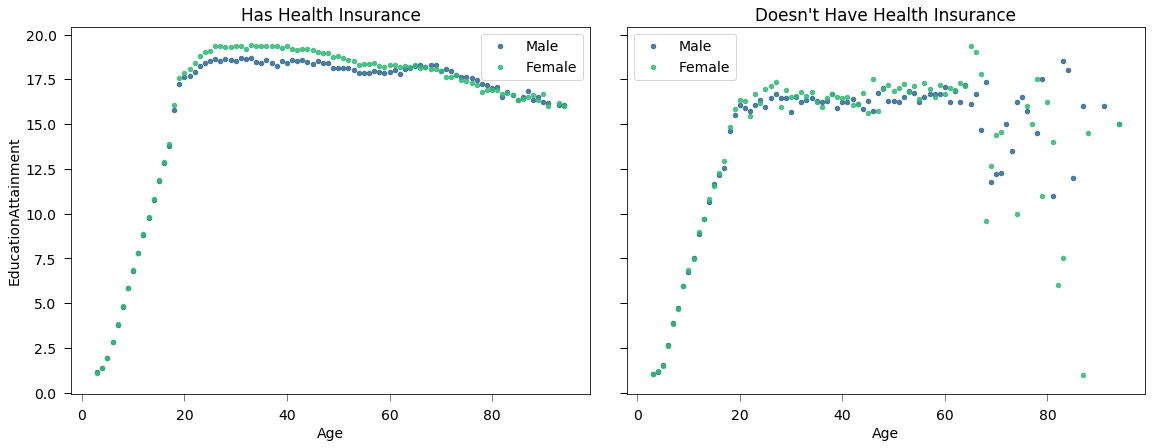

In [37]:
df_subset1 = df[df['HealthInsurance'] == 1]
df_subset2 = df[df['HealthInsurance'] == 2]

census_data.getSpecialPlot2("Age", "EducationAttainment", "Sex", df_subset1, df_subset2, labels=["Male", "Female"], 
                titleOn=True, titles=["Has Health Insurance", "Doesn't Have Health Insurance"])

In [38]:
df, df_subset = None, None
df_subset1, df_subset2 = None, None